# Pandas Lab 1

**Objective:** Clean up and create balanced dataset from a raw dataset.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
import html 
import re 


CSV_DIR = '../csv'

df = pd.read_csv(f'{CSV_DIR}/crypto-news.csv')
df = df.dropna()

def cleanup_text(x):
    x = html.unescape(x.strip())
    x = re.sub('<.*?>', '', x)
    x = re.sub('\s+', ' ', x)
    return x

df['text'] = df['text'].apply(cleanup_text)

df['num_tokens'] = df['text'].apply(lambda x: len(x.split(' ')))
df = df[df['num_tokens'] < 10]
df = df.drop('num_tokens', axis=1)

df

,text,label
0,Positive's #3,positive
2,Positive #1,positive
3,Negative #1,negative
4,Neutral #1,neutral
5,Negative #4,negative
6,Bitcoin Was Built for This Moment,neutral
7,Neutral #4,neutral
8,Negative #5,negative
10,Positive #2,positive
11,Negative #3,negative


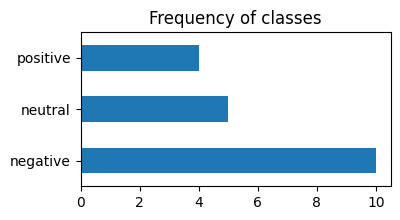

In [149]:
df['label'].value_counts().plot.barh(figsize=(4,2))
plt.title('Frequency of classes')
plt.show()

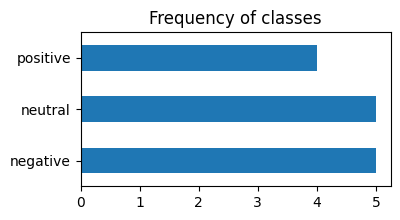

In [150]:
positive_dataset = df[df['label'] == 'positive']
neutral_dataset = df[df['label'] == 'neutral']
negative_dataset = df[df['label'] == 'negative'].sample(5, random_state=42)

balanced_df = pd.concat([positive_dataset, negative_dataset, neutral_dataset]).sample(frac=1)

balanced_df['label'].value_counts().plot.barh(figsize=(4,2))
plt.title('Frequency of classes')
plt.show()

In [151]:
balanced_df.to_csv(f'{CSV_DIR}/crypto-news-clean.csv', index=False)